## Notebook with the code required to read a CONPES document

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing pdfplumber
if 'google.colab' in str(get_ipython()):
  !pip install pdfplumber
import pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Importing libraries
from google.colab import drive
import requests as r
import pandas as pd
import numpy as np
import json
import os
import re

In [ ]:
## Mounting the Google Drive
drive.mount('/content/drive')
outdir = 'drive/MyDrive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Outdir for Ernesto's Drive
outdir = 'drive/MyDrive/DS4A/Team 19 - DS4A - Tecnoquímicas/CONPES_Dataset/'

In [ ]:
arch = outdir + 'PDF/CONPES_4083.pdf'
with pdfplumber.open(arch) as pdf:
            page = pdf.pages[10]
            text = page.extract_text()
            print(text)

 
 
 
1995 Gestión pública orientada a resultados9 (GPOR). El documento reafirma la necesidad 
de: (i) mejorar la capacidad institucional a través de herramientas como la planeación 
estratégica, el desarrollo de un marco multianual para que las decisiones se tomen a la luz 
de objetivos de mediano plazo, la asignación de recursos de manera consciente con dicho 
marco, la especificación de resultados de gestión esperados en términos de metas, y la 
evaluación de la efectividad de los programas; (ii) fortalecer el manejo presupuestal, dar más 
importancia a la composición y eficiencia del gasto; y (iii) exigir resultados, la autonomía 
administrativa y presupuestal requiere mayor exigencia en el logro y reporte de resultados en 
áreas estratégicas (DNP, 1995). Este documento además estableció diferentes instrumentos 
para la medición de resultados de las estrategias y programas delineados en los PND. 
También, profundizó en la nueva relación Estado-ciudadanía, a partir del fortalecimien

In [ ]:
with pdfplumber.open(arch) as pdf: 
    content = ''
    for i in range(len(pdf.pages)):
        # Leer la página i + 1 del documento PDF
        page = pdf.pages[i] 
 
        #La función page.extract_text () lee el contenido del texto, el siguiente paso es eliminar el número de página inferior del documento
        #page_content = page.extract_text()
        page_content = '\n'.join(page.extract_text().split('\n')[:-1])
        content = content + page_content
 
 
 # Extraiga el contenido de "palabras claves"
 #result = content.split ('Palabras clave:') [1].split ('2. Otra información relevante') [0]

In [ ]:
content

' \n \nDocumento\n4083 \n  \nC\nONPES\n           \n \nCONSEJO NACIONAL DE POLÍTICA ECONÓMICA Y SOCIAL  \nREPÚBLICA DE COLOMBIA \nDEPARTAMENTO NACIONAL DE PLANEACIÓN \n \n \n \n \n \n \n \n \n \n \n \n \nFORTALECIMIENTO DEL USO Y LA INSTITUCIONALIDAD DE LAS \nEVALUACIONES PARA LA TOMA DE DECISIONES EN COLOMBIA \n \n \n \n \n \nDepartamento Nacional de Planeación  \nDepartamento Administrativo de la Función Pública \nDepartamento Administrativo Nacional de Estadística \nMinisterio de Tecnologías de la Información y las Comunicaciones \n \n \n \n \nVersión aprobada \n \n \n \n \nBogotá, D.C., 16 de mayo de 2022 \n   \n  \n \n \nCONSEJO NACIONAL DE POLÍTICA ECONÓMICA Y SOCIAL \nCONPES \n \nIván Duque Márquez \nPresidente de la República \n \nMarta Lucía Ramírez Blanco \nVicepresidenta de la República \n \nDaniel Palacios Martínez  Marta Lucía Ramírez Blanco \nMinistro del Interior  Ministra de Relaciones Exteriores  \nJosé Manuel Restrepo Abondano  Wilson Ruíz Orejuela \nMinistro de Hacie

In [ ]:
import re
texto = "\nPalabras clave:*"
encontrar  = re.findall(texto,content)

In [ ]:
print(type(content))

<class 'str'>


In [ ]:
print(arch)

drive/MyDrive/DS4A/Team 19 - DS4A - Tecnoquímicas/CONPES_Dataset/PDF/CONPES_4083.pdf


In [ ]:
doc_conpes = "CONPES_4083"

In [ ]:
documento = pdfplumber.open(arch)

In [ ]:
i = 10
pagina = documento.pages[i]

In [ ]:
texto = pagina.extract_text(use_text_flow=True)
df_documentos = pd.DataFrame()
paragraphs = re.split(r'[ \t\r\f\v]*\n[ \t\r\f\v]*\n[ \t\r\f\v]*', texto)
#nueva_fila = { 'No_Doc': doc_conpes,'Texto': texto, 'Parrafo': i+1, 'Pagina': i+1} # creamos un diccionario

j = 0
for value in paragraphs:
    if len(value) > 0:
      nueva_fila = { 'No_Doc': doc_conpes,'Texto': value, 'Parrafo': j, 'Pagina': i+1} # creamos un diccionario
      df_documentos = df_documentos.append(nueva_fila, ignore_index=True)
    j = j + 1

In [ ]:
df_documentos.head()

,No_Doc,Texto,Parrafo,Pagina
0,CONPES_4083,\n1995 Gestión pública orientada a resultados9...,1.0,11.0
1,CONPES_4083,"Como resultado del Documento CONPES 2790, se c...",2.0,11.0
2,CONPES_4083,El Documento CONPES 3002 de 1997 El Salto Soci...,3.0,11.0
3,CONPES_4083,La falta de claridad en las competencias y res...,4.0,11.0
4,CONPES_4083,9 Disponible en: https://colaboracion.dnp.gov....,5.0,11.0


In [ ]:
print(df_documentos.iloc[1]['Texto'])

Como resultado del Documento CONPES 2790, se crean los planes indicativos 
cuatrienales con planes de acción anuales, como herramientas estratégicas que inician 
la tarea de seguimiento y evaluación a los compromisos plasmados en el PND 1994-
1998 y fueron aplicados en 12 entidades a nivel nacional. Estos planes indicativos se 
desarrollaron  planteando  áreas  estratégicas,  resultados  y  responsables.  Además,  se 
conformaron  también  Unidades  de  Gestión,  que  debían  concertar  los  objetivos  y  los 
programas del PND, garantizar una adecuada articulación entre diferentes organismos del 
Estado y monitorear compromisos a través de los acuerdos de eficiencia.


In [ ]:
#Trying to install the spacy library and pipelines but it doesn't seem to work because the pipelines are not recognized latter
!pip install spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.2 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
#importing common NLP libraries for general processing and downloading the stopwords dictionaries (spanish included)
import nltk
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Trying to load the pipelines for spanish in spacy but get an error related to python not finding the package in path
import spacy
import es_core_news_md
nlp = es_core_news_md.load()

In [ ]:
#Processing the entire document in the variable content using spaCy 4.5s
doc=nlp(content)

In [ ]:
#Getting the tokens for the Non-Stop words using spaCy for the entire document 0.2s
spaCyNonStopWords=[token for token in doc if not token.is_stop]

In [ ]:
#Checking the lenght of the list of Non-Stop Words
len(spaCyNonStopWords)

20422

In [ ]:
#Checking the total number of tokens in the original document
doc.__len__()

30197

In [ ]:
#Extracting the words from the Non_stop tokens with spaCy 0.22s
word_cloud_text_spaCy=' '.join([token.text for token in spaCyNonStopWords])

In [ ]:
#Checkin the output of the Non-Stop words put together, seems that non printable caracters like \n still remains, probably will need to remove them before loading the document to spaCy
word_cloud_text_spaCy

' \n \n Documento \n 4083 \n  \n C \n ONPES \n           \n \n CONSEJO NACIONAL POLÍTICA ECONÓMICA Y SOCIAL  \n REPÚBLICA COLOMBIA \n DEPARTAMENTO NACIONAL PLANEACIÓN \n \n \n \n \n \n \n \n \n \n \n \n \n FORTALECIMIENTO Y INSTITUCIONALIDAD \n EVALUACIONES TOMA DECISIONES COLOMBIA \n \n \n \n \n \n Departamento Nacional Planeación  \n Departamento Administrativo Función Pública \n Departamento Administrativo Nacional Estadística \n Ministerio Tecnologías Información y Comunicaciones \n \n \n \n \n Versión aprobada \n \n \n \n \n Bogotá , D.C. , 16 mayo 2022 \n   \n  \n \n \n CONSEJO NACIONAL POLÍTICA ECONÓMICA Y SOCIAL \n CONPES \n \n Iván Duque Márquez \n Presidente República \n \n Marta Lucía Ramírez Blanco \n Vicepresidenta República \n \n Daniel Palacios Martínez   Marta Lucía Ramírez Blanco \n Ministro Interior   Ministra Relaciones Exteriores  \n José Manuel Restrepo Abondano   Wilson Ruíz Orejuela \n Ministro Hacienda y Crédito Público   Ministro Justicia y Derecho \n Diego And

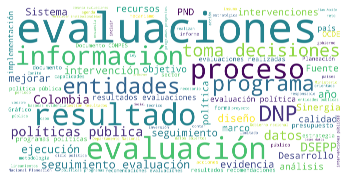

In [ ]:
wordcloud_NonStop_Spacy = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_spaCy)
plt.figure()
plt.imshow(wordcloud_NonStop_Spacy, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
word_cloud_text_spaCy_Lemma=' '.join([token.lemma_ for token in spaCyNonStopWords])

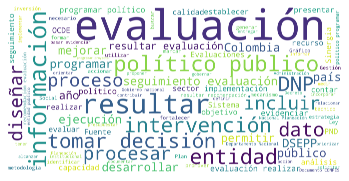

In [ ]:
wordcloud_NonStop_Spacy = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_spaCy_Lemma)
plt.figure()
plt.imshow(wordcloud_NonStop_Spacy, interpolation="bilinear")
plt.axis("off")
plt.show()

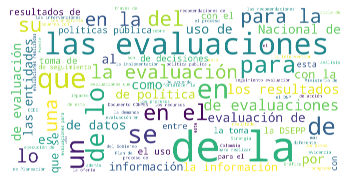

In [ ]:
wordcloud_NonStop_Spacy = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(content)
plt.figure()
plt.imshow(wordcloud_NonStop_Spacy, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import sqlite3
my_conn = sqlite3.connect('example.db')

OperationalError: ignored